In [1]:
#importint the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the Dataset

In [3]:
#naming the dataframe as train_data since we will be primarily training by spliting into 70-30 for training and testing
train_data = pd.read_csv("tested.csv")

EDA

In [5]:
# to understand the dataset, we need to see just the first 5, in this case using head will give us the idea
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# seeing the shape of the dataset
train_data.shape

(418, 12)

In [7]:
# from the column of survived , we are getting individual values of surivival as the survived as 1 and not survived as 0
survived=train_data["Survived"].value_counts().get(1,0)
not_survived=train_data["Survived"].value_counts().get(0,0)


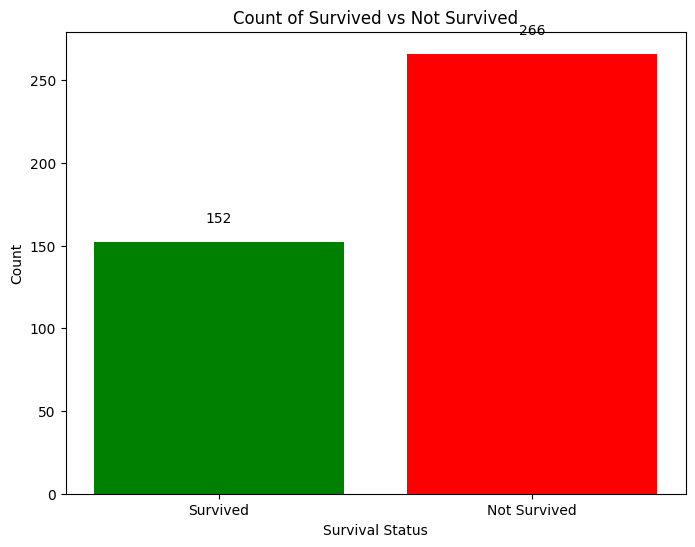

In [32]:


# Create a bar plot to visualize survival counts
plt.figure(figsize=(8, 6))  # Set the figure size

# Plotting the bar chart
bars=plt.bar(['Survived', 'Not Survived'], [survived, not_survived], color=['green', 'red'])

# Adding labels and title
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count of Survived vs Not Survived')

# Annotate each bar with its value
for bar, count in zip(bars, [survived, not_survived]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(count), ha='center', va='bottom')


# Display the plot
plt.show()


In [24]:
male_count= train_data["Sex"].value_counts().get("male")
female_count = train_data["Sex"].value_counts().get("female")

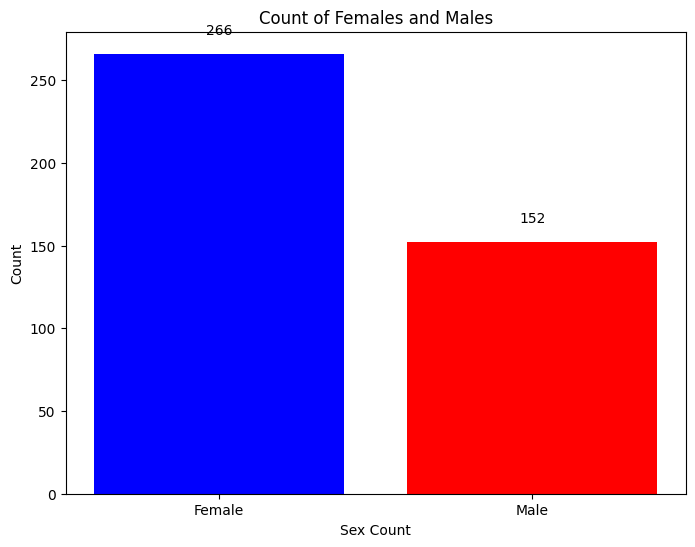

In [26]:
# Create a bar plot to visualize survival counts
plt.figure(figsize=(8, 6))  # Set the figure size

# Plotting the bar chart
bars=plt.bar(['Female', 'Male'], [male_count, female_count], color=['blue', 'red'])

# Adding labels and title
plt.xlabel('Sex Count')
plt.ylabel('Count')
plt.title('Count of Females and Males')


# Annotate each bar with its value
for bar, count in zip(bars, [male_count, female_count]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(count), ha='center', va='bottom')


# Display the plot
plt.show()



In [34]:
train_data["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [36]:
train_data["Pclass"].unique()

array([3, 2, 1])

In [38]:
class1_count=train_data["Pclass"].value_counts().get(1,0)
class2_count=train_data["Pclass"].value_counts().get(2,0)
class3_count=train_data["Pclass"].value_counts().get(3,0)


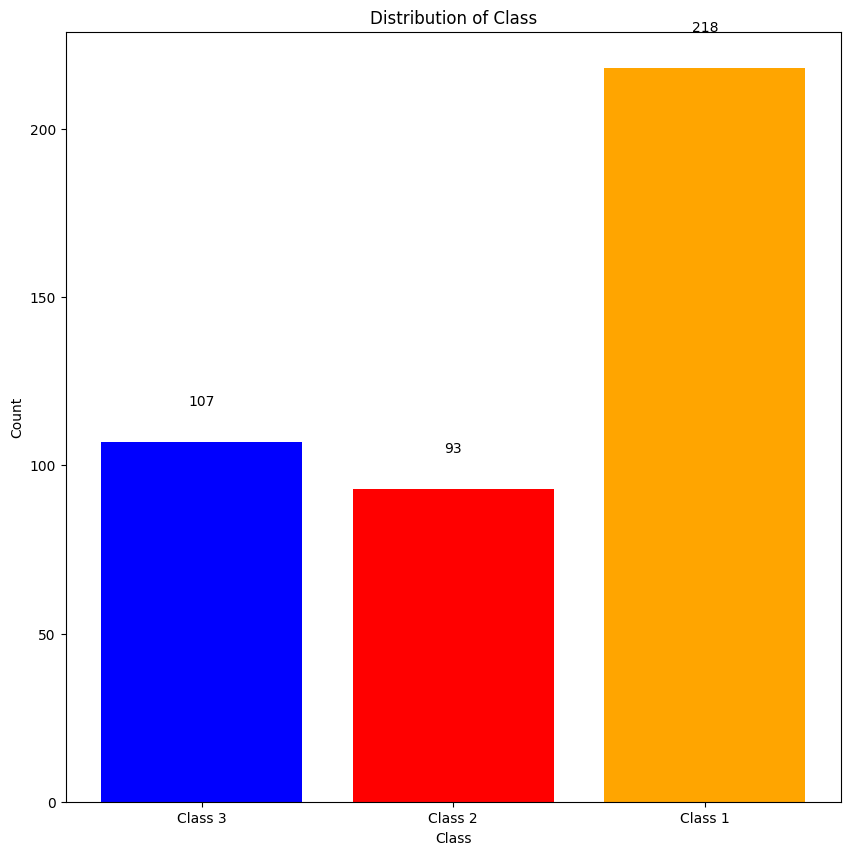

In [40]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Plotting the bar chart
bars=plt.bar(['Class 3', 'Class 2','Class 1'], [class1_count, class2_count, class3_count], color=['blue', 'red','orange'])

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class')

# Annotate each bar with its value
for bar, count in zip(bars, [class1_count, class2_count, class3_count]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(count), ha='center', va='bottom')



# Display the plot
plt.show()


In [42]:
sum(train_data["Survived"].isnull())

0

In [44]:
sum(train_data["Age"].isnull())

86

In [46]:
train_data=train_data.dropna()

In [48]:
x= train_data["Age"]
y=train_data["Survived"]


In [50]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score, mean_squared_error


x = x.to_numpy()  # Convert x to a numpy array
y = y.to_numpy() 

x = x.reshape(-1, 1)  # Reshape x to a 2D array (n_samples, n_features)





In [51]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [53]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics (e.g., R-squared score, Mean Squared Error)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print("R-squared Score:", r2)
print("Mean Squared Error:", mse)


R-squared Score: -0.0037755189538233314
Mean Squared Error: 0.2505996494507488


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=96)

In [60]:
# Example: Train a machine learning model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.48148148148148145


In [80]:

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

df = pd.read_csv('tested.csv')
df=df.dropna()

In [82]:
# Preprocessing
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encode 'Sex' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'].fillna('Unknown'))  # Encode 'Embarked' column
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df['Survived']  # Target

In [84]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=96)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        15

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



/Users/harinivasanchandrasekaran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


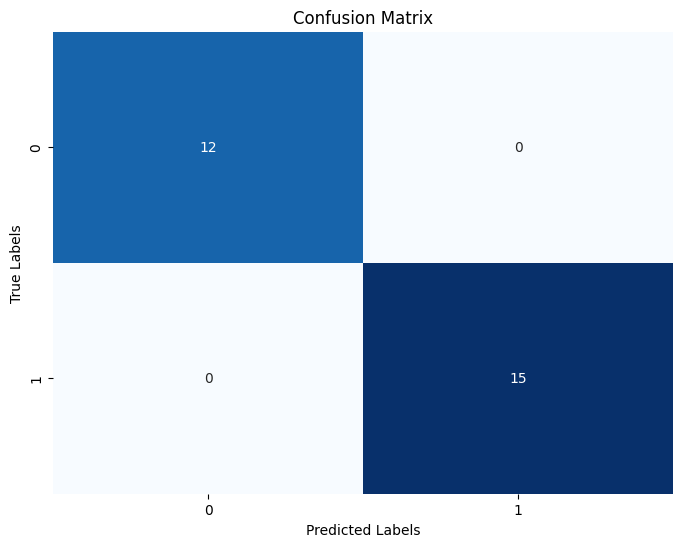

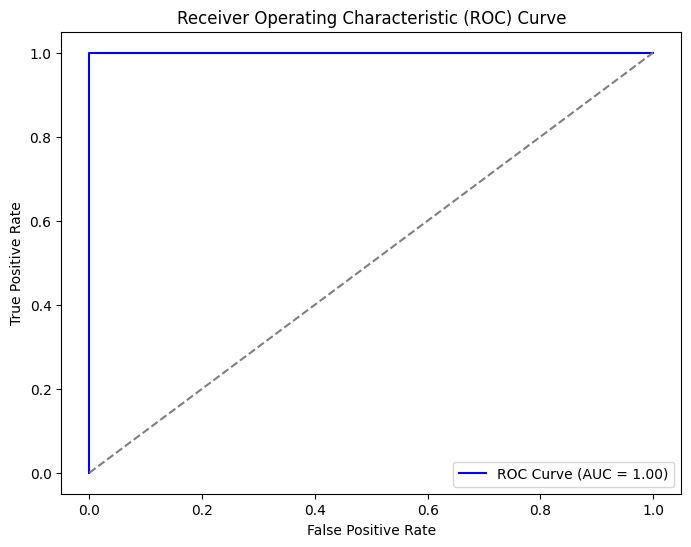

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
